Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("RELI Historical Data.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Vol.'] = df['Vol.'].apply(lambda x: float(re.sub('M|B','',x)))
df['Change %'] = df['Change %'].apply(lambda x: float(re.sub('\%','',x)))
df['Price'] = df['Price'].apply(lambda x: float(re.sub(',', '', x)))
df['Open'] = df['Open'].apply(lambda x: float(re.sub(',', '', x)))
df['High'] = df['High'].apply(lambda x: float(re.sub(',', '', x)))
df['Low'] = df['Low'].apply(lambda x: float(re.sub(',', '', x)))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      254 non-null    datetime64[ns]
 1   Price     254 non-null    float64       
 2   Open      254 non-null    float64       
 3   High      254 non-null    float64       
 4   Low       254 non-null    float64       
 5   Vol.      254 non-null    float64       
 6   Change %  254 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.0 KB


In [5]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-05-01,2867.95,2942.00,2953.50,2768.50,65.68,-2.25
1,2024-04-01,2934.00,2984.95,2988.00,2883.00,109.75,-1.27
2,2024-03-01,2971.70,2927.00,3024.90,2825.80,113.10,1.71
3,2024-02-01,2921.60,2870.00,2999.90,2836.10,119.41,2.62
4,2024-01-01,2847.10,2583.00,2913.40,2570.35,79.53,10.14
...,...,...,...,...,...,...,...
249,2003-08-01,68.23,61.25,72.31,58.50,477.76,11.96
250,2003-07-01,60.94,55.52,61.61,55.04,546.19,10.16
251,2003-06-01,55.32,50.91,57.51,49.59,495.33,8.81
252,2003-05-01,50.84,46.76,51.42,43.78,264.53,8.80


In [6]:
df = df[::-1]

In [7]:
df.reset_index(drop = True,inplace=True)

In [8]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2003-04-01,46.73,46.99,51.42,45.08,347.83,-1.31
1,2003-05-01,50.84,46.76,51.42,43.78,264.53,8.80
2,2003-06-01,55.32,50.91,57.51,49.59,495.33,8.81
3,2003-07-01,60.94,55.52,61.61,55.04,546.19,10.16
4,2003-08-01,68.23,61.25,72.31,58.50,477.76,11.96
...,...,...,...,...,...,...,...
249,2024-01-01,2847.10,2583.00,2913.40,2570.35,79.53,10.14
250,2024-02-01,2921.60,2870.00,2999.90,2836.10,119.41,2.62
251,2024-03-01,2971.70,2927.00,3024.90,2825.80,113.10,1.71
252,2024-04-01,2934.00,2984.95,2988.00,2883.00,109.75,-1.27


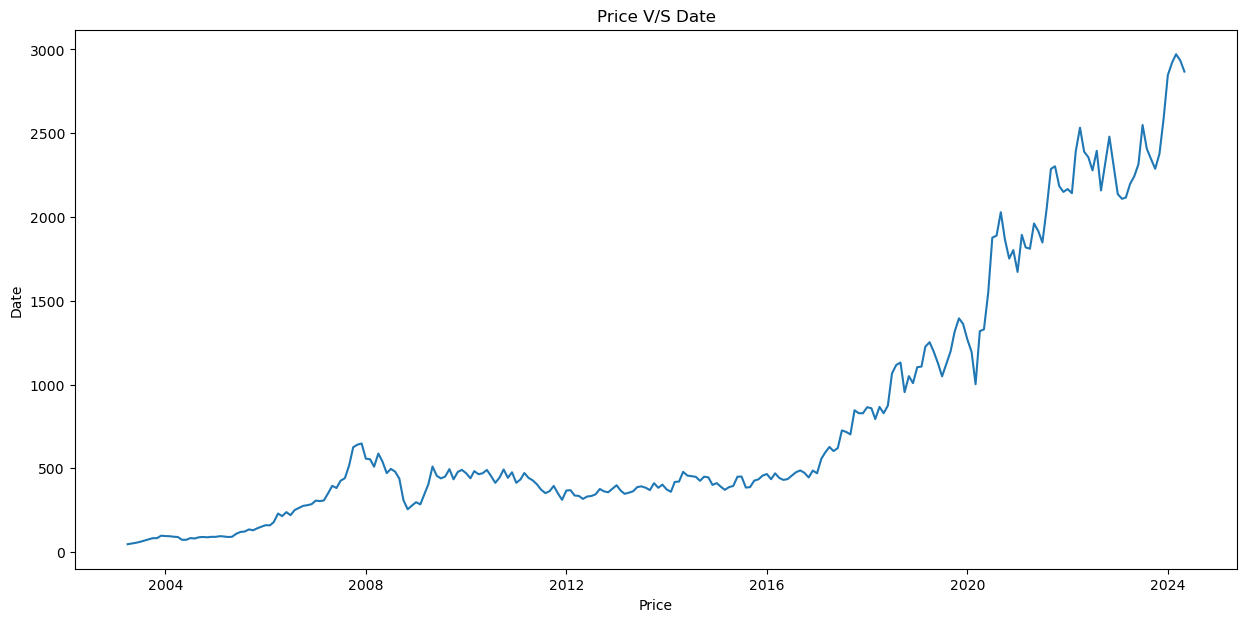

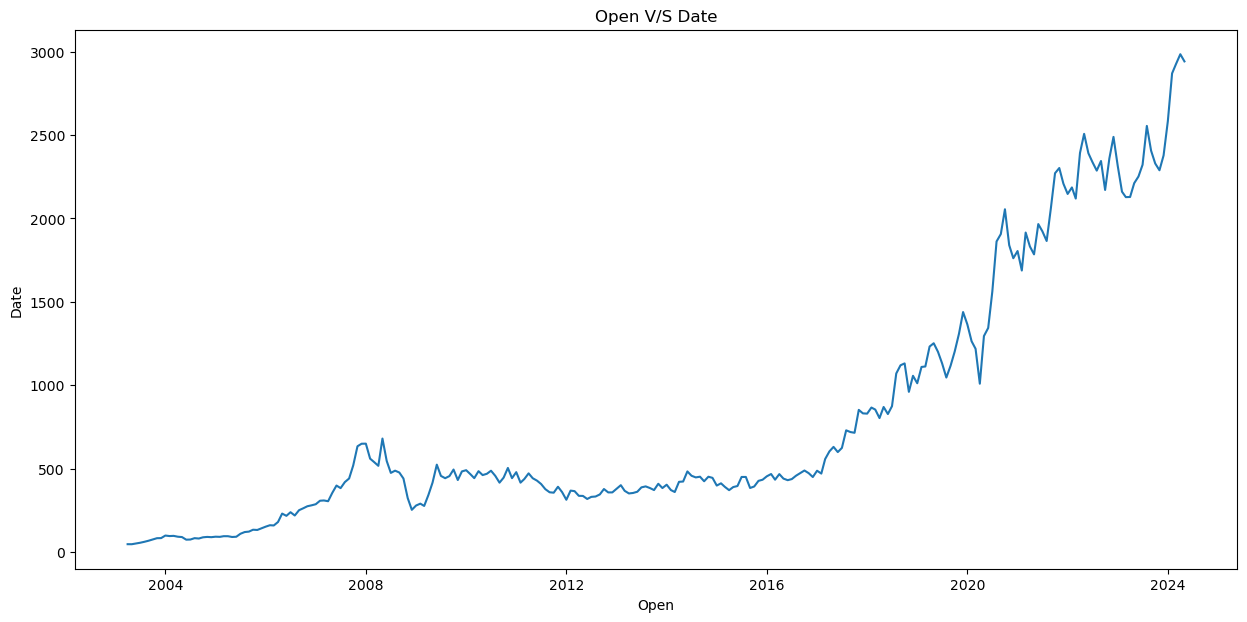

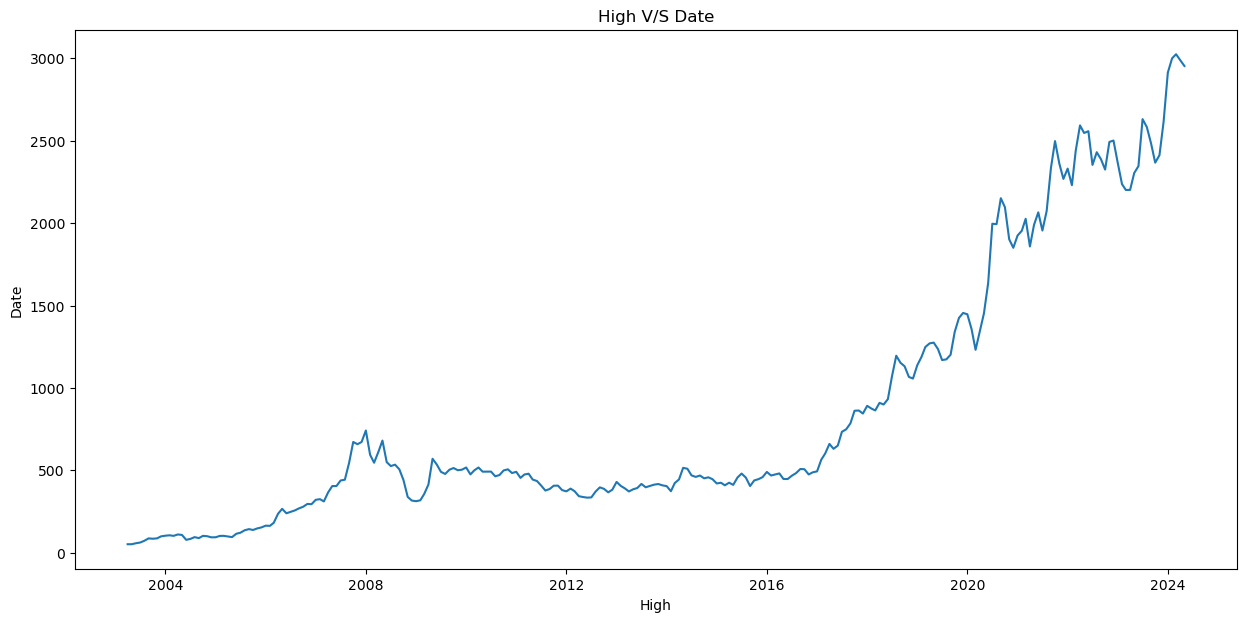

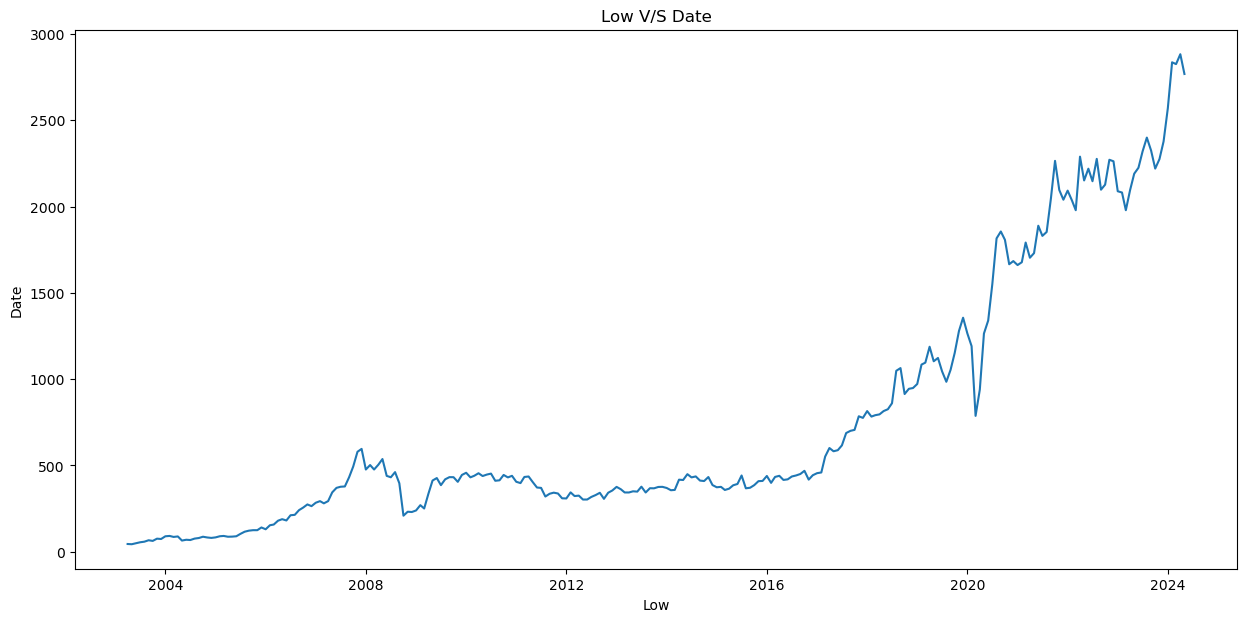

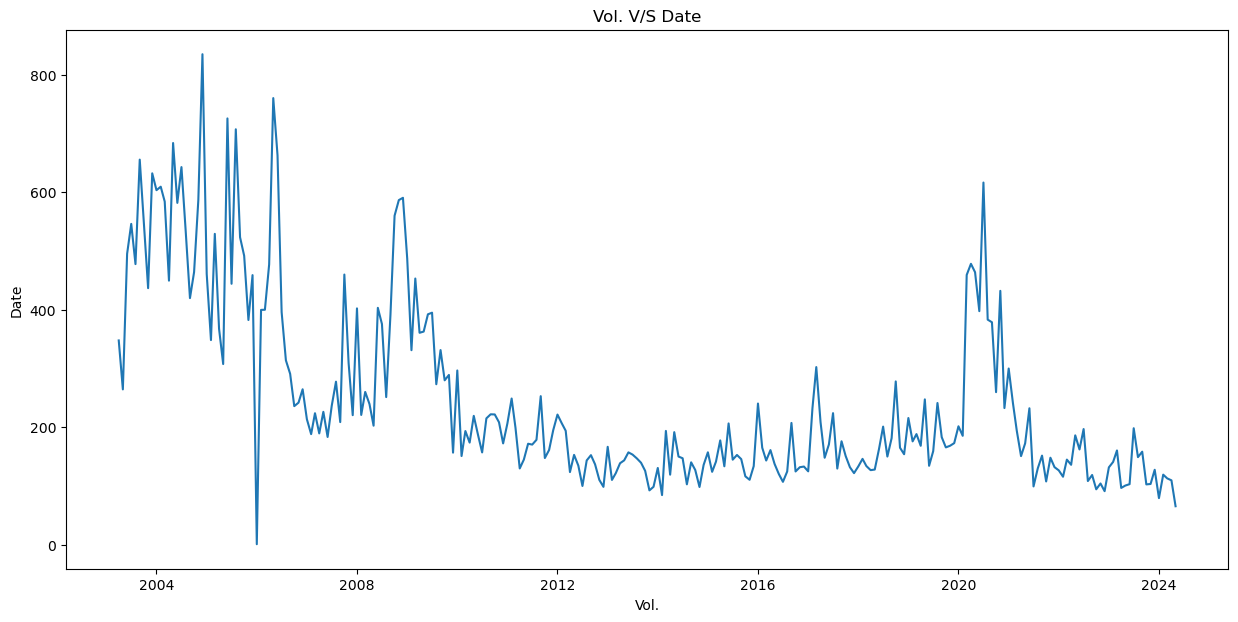

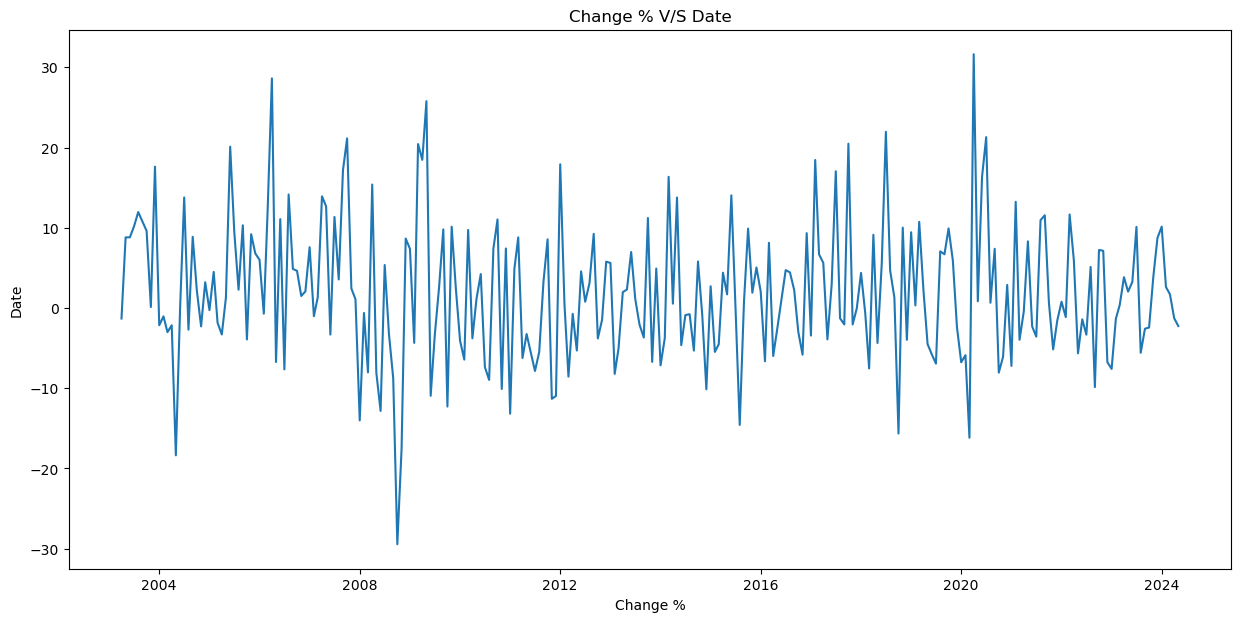

In [9]:
for i in df.columns:
    if i == 'Date':
        continue
    else:
        plt.figure(figsize=(15,7))
        plt.plot(df['Date'],df[i])
        plt.title(f"{i} V/S Date")
        plt.xlabel(i)
        plt.ylabel("Date")
        plt.show()
        

In [10]:
df.to_excel('Reliance_Monthly.xlsx')

In [11]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,254,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,2013-10-16 01:36:22.677165312,800.044252,791.209331,844.206181,746.914252,247.277520,1.992126
min,2003-04-01 00:00:00,46.730000,46.760000,51.420000,43.780000,1.030000,-29.440000
25%,2008-07-08 18:00:00,351.212500,354.080000,374.222500,326.190000,137.142500,-3.772500
50%,2013-10-16 12:00:00,450.655000,450.795000,480.640000,431.155000,185.925000,1.245000
75%,2019-01-24 06:00:00,1106.252500,1099.977500,1172.137500,981.847500,306.377500,7.415000
max,2024-05-01 00:00:00,2971.700000,2984.950000,3024.900000,2883.000000,834.950000,31.630000
std,NaN,756.925402,748.570889,788.052421,717.142002,158.002075,8.640528


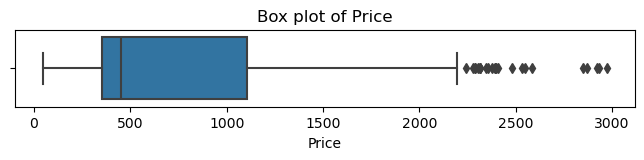

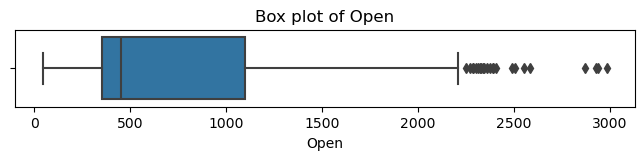

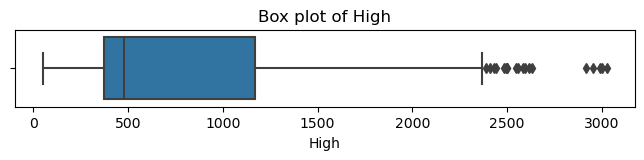

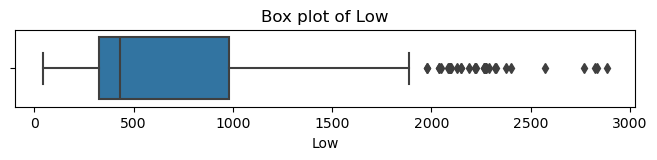

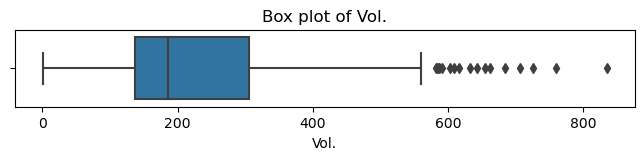

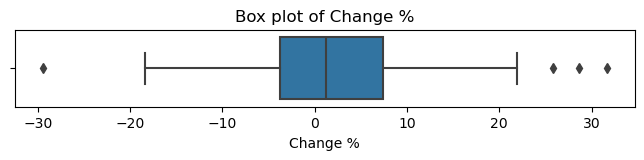

In [12]:
import seaborn as sns
for i in df.columns:
    if i=='Date':
        continue
    else:
        plt.figure(figsize=(8,1))
        sns.boxplot(x=df[i])
        plt.title(f"Box plot of {i}")
        plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [14]:
column_order = ['Year', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
df = df[column_order]

In [15]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [32]:
models = [
    ('linear regression', LinearRegression()),
    ('ElasticNet', ElasticNetCV()),
    ('KNN', KNeighborsRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('LightGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(logging_level='Silent')),  # Set logging_level to 'Silent' to avoid training progress output
    ('XGBoost', XGBRegressor())
]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Price'])
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report
import numpy as np

for model_name,model in models:
    pipe = Pipeline([
        ('Scaler',StandardScaler()),
        (model_name,model)
    ])
    print(model_name)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**(0.5)  
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae} | (MSE): {mse} | (RMSE): {rmse} | (R2 ): {r2}")

linear regression
MAE: 22.0890374912735 | (MSE): 823.951304843721 | (RMSE): 28.70455198820774 | (R2 ): 0.9986056313080971
ElasticNet
MAE: 103.26202203285327 | (MSE): 22194.341230961847 | (RMSE): 148.97765346172508 | (R2 ): 0.9624406268089686
KNN
MAE: 82.24882352941175 | (MSE): 11604.166650901961 | (RMSE): 107.72263759721984 | (R2 ): 0.980362326537355
AdaBoost
MAE: 52.27542128239132 | (MSE): 5214.317855907238 | (RMSE): 72.21023373391917 | (R2 ): 0.9911758358471363
Gradient Boosting
MAE: 26.69456748318774 | (MSE): 1628.0199920661971 | (RMSE): 40.348729745386 | (R2 ): 0.9972449098710273
Random Forest
MAE: 33.14602941176465 | (MSE): 2559.5765682382225 | (RMSE): 50.59225798714881 | (R2 ): 0.9956684413140695
Extra Trees
MAE: 30.10614313725492 | (MSE): 1936.2167252464694 | (RMSE): 44.002462717971476 | (R2 ): 0.9967233500735405
LightGBM
MAE: 65.36356820189988 | (MSE): 13171.944962559868 | (RMSE): 114.769094108823 | (R2 ): 0.9777091831042795
CatBoost
MAE: 32.26665660495224 | (MSE): 2504.5549052

Linear Regression is the best fit model here

Pickle

In [35]:
import pickle
pickle.dump(pipe,open('model_lr.pkl','wb'))

In [36]:
pick = pickle.load(open('model_lr.pkl', 'rb'))

In [37]:
features = df.drop(columns=['Price'])
d = np.array([2019,2,1,1109.78,1188.20,1084.60,176.07,0.32]).reshape(1,-1)
prediction = pick.predict(d)
print(f"The predicted value is: {prediction}")

The predicted value is: [1137.8589]
